Pseudo labelling and splitting data by angle

In [82]:
%load_ext autoreload
%autoreload 2

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pdb
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras import backend as K
from matplotlib import pyplot as plt
%matplotlib inline
import scipy
from scipy import misc, ndimage
from scipy.ndimage.interpolation import zoom
from scipy.ndimage import imread
import helpers
from models import DaveModel, DaveVGG


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
train = pd.read_json("_RawData/train.json/data/processed/train.json")
test = pd.read_json("_RawData/test.json/data/processed/test.json")

In [11]:
X = helpers.get_images(train)

In [12]:
y = to_categorical(train.is_iceberg.values,num_classes=2)

In [13]:
Xtr, Xv, ytr, yv = train_test_split(X, y, shuffle=False, test_size=0.20)

In [32]:
# Create the model and compile
model = DaveModel(Xtr, ytr, Xv, yv)

In [33]:
model.train(32, 10)

Batch Size: 32
Epochs: 10
Epoch 1/10
41/40 [==============================] - 3s - loss: 0.5740 - acc: 0.6958 - val_loss: 0.6543 - val_acc: 0.6573
Epoch 2/10
41/40 [==============================] - 1s - loss: 0.4822 - acc: 0.7529 - val_loss: 0.6414 - val_acc: 0.6573
Epoch 3/10
41/40 [==============================] - 1s - loss: 0.4507 - acc: 0.7732 - val_loss: 0.6603 - val_acc: 0.6573
Epoch 4/10
41/40 [==============================] - 1s - loss: 0.4206 - acc: 0.7941 - val_loss: 0.7224 - val_acc: 0.6573
Epoch 5/10
41/40 [==============================] - 1s - loss: 0.3985 - acc: 0.8025 - val_loss: 0.8164 - val_acc: 0.6573
Epoch 6/10
41/40 [==============================] - 1s - loss: 0.3969 - acc: 0.8105 - val_loss: 0.8896 - val_acc: 0.6573
Epoch 7/10
41/40 [==============================] - 1s - loss: 0.3682 - acc: 0.8205 - val_loss: 0.9699 - val_acc: 0.6573
Epoch 8/10
41/40 [==============================] - 1s - loss: 0.3404 - acc: 0.8452 - val_loss: 1.1193 - val_acc: 0.6573
Epoch 

In [84]:
vgg = DaveVGG(Xtr, ytr, Xv, yv)

In [85]:
vgg.train(32, 1, True)

Batch Size: 32
Epochs: 1
Epoch 1/1
41/40 [==============================] - 6s - loss: 0.6914 - acc: 0.5745 - val_loss: 0.7084 - val_acc: 0.3427


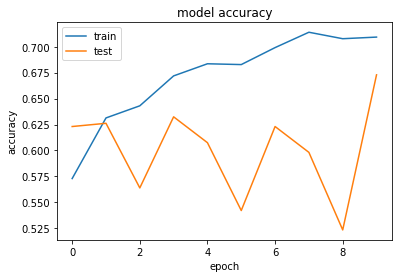

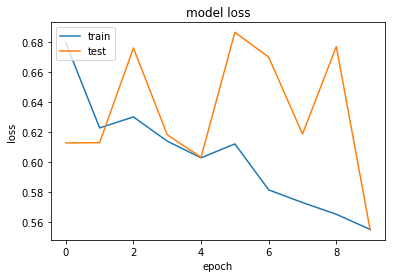

In [68]:
vgg.plot_results()